In [1]:
!cat ../data/state_of_the_union/Joe_Biden\'s_First.txt

9:06 P.M. EDT

THE PRESIDENT:  Thank you.  (Applause.)  Thank you.  Thank you.  Good to be back.  And Mitch and Chuck will understand it’s good to be almost home, down the hall.  Anyway, thank you all.

Madam Speaker, Madam Vice President — (applause) — no President has ever said those words from this podium.  No President has ever said those words, and it’s about time.  (Applause.)

First Lady — (applause) — I’m her husband; Second Gentleman; Chief Justice; members of the United States Congress and the Cabinet; distinguished guests; my fellow Americans: While the setting tonight is familiar, this gathering is just a little bit different — a reminder of the extraordinary times we’re in.

Throughout our history, Presidents have come to this chamber to speak to Congress, to the nation, and to the world to declare war, to celebrate peace, to announce new plans and possibilities.

Tonight, I come to talk about crisis and opportunity, about rebuilding the nation, revitalizing our democracy,

In [2]:
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [3]:
DATA = '../data/state_of_the_union'

In [4]:
docs = sorted([doc for doc in os.listdir(DATA) if doc.endswith('.txt')])
docs[:10]

["Abraham_Lincoln's_First.txt",
 "Abraham_Lincoln's_Fourth.txt",
 "Abraham_Lincoln's_Second.txt",
 "Abraham_Lincoln's_Third.txt",
 "Andrew_Jackson's_Eighth.txt",
 "Andrew_Jackson's_Fifth.txt",
 "Andrew_Jackson's_First.txt",
 "Andrew_Jackson's_Fourth.txt",
 "Andrew_Jackson's_Second.txt",
 "Andrew_Jackson's_Seventh.txt"]

In [5]:
n_docs = len(docs)
print(n_docs)

229


In [6]:
def clean(txt):
    apostrophes = re.compile(r"'’")
    numeric = re.compile(r'[0-9]+')
    non_alphanum = re.compile(r'\W+')
    whitespace = re.compile(r'\s+')
    txt = txt.lower()
    txt = re.sub(apostrophes, '', txt)
    txt = txt.replace("'", '').replace('’', '')
    txt = re.sub(numeric, ' ', txt)
    txt = re.sub(non_alphanum, ' ', txt)
    txt = re.sub(whitespace, ' ', txt)
    txt = txt.strip()
    return txt

In [7]:
def read_doc(path):
    with open(path, 'r') as f:
        doc = f.read()
    doc = clean(doc)
    return doc

In [8]:
a1 = read_doc(f'{DATA}/{docs[0]}')
a1[:100]

'fellow citizens of the senate and house of representatives in the midst of unprecedented political t'

In [9]:
corpus = [read_doc(f'{DATA}/{doc}') for doc in docs]

In [10]:
stop_words = [
    'a', 'about', 'again', 'all', 'also', 'am', 'an', 'and', 'any',
    'applause', 'are', 'as', 'at', 'back', 'be', 'because', 'been',
    'before', 'but', 'by', 'can', 'cannot', 'cant', 'did', 'do', 'does',
    'done', 'dont', 'down', 'during', 'every', 'for', 'from', 'get',
    'going', 'got', 'have', 'had', 'has', 'he', 'here', 'his', 'how',
    'i', 'if', 'ill', 'im', 'in', 'into', 'is', 'it', 'its', 'ive',
    'let', 'lets', 'make', 'made', 'many', 'may', 'me', 'more', 'most',
    'must', 'my', 'need', 'no', 'nor', 'not', 'now', 'of', 'on', 'only',
    'or', 'other', 'our', 'out', 'over', 'shall', 'she', 'should', 'so',
    'some', 'st', 'such', 'than', 'that', 'thats', 'the', 'their',
    'them', 'there', 'theres', 'these', 'they', 'this', 'those',
    'through', 'to', 'too', 'under', 'up', 'upon', 'us', 'was', 'we',
    'weve', 'were', 'what', 'which', 'when', 'where', 'while', 'who',
    'will', 'with', 'wont', 'would', 'you', 'your']
vectorizer = TfidfVectorizer(
    lowercase=True, stop_words=stop_words, ngram_range=(1, 2))
tf_idf = vectorizer.fit_transform(corpus)

In [11]:
tf_idf

<229x610838 sparse matrix of type '<class 'numpy.float64'>'
	with 1187190 stored elements in Compressed Sparse Row format>

In [12]:
def rename(speech):
    try:
        segments = speech.replace('.txt', '').split('_')
        if len(segments) < 3:
            segments += ['First']
        names = segments[:-2]
        surname, order = segments[-2:]
        init = ''.join([name[0] for name in names])
        surname = re.sub("'s?", '', surname)
        n = {
            'First': '1',
            'Second': '2',
            'Third': '3',
            'Fourth': '4',
            'Fifth': '5',
            'Sixth': '6',
            'Seventh': '7',
            'Eighth': '8',
            'Ninth': '9',
            'Tenth': '10',
            'Eleventh': '11',
            'Twelfth': '12'
        }[order]
        return ''.join([init, surname, n])
    except:
        print(speech)
        raise

In [13]:
df = pd.DataFrame(
    tf_idf.T.todense(),
    index=vectorizer.get_feature_names_out(),
    columns=[doc.replace('.txt', '') for doc in docs])
df.rename(columns={x: rename(x) for x in list(df)}, inplace=True)
df.head(5)

,ALincoln1,ALincoln4,ALincoln2,ALincoln3,AJackson8,AJackson5,AJackson1,AJackson4,AJackson2,AJackson7,...,WMcKinley3,WWilson8,WWilson5,WWilson1,WWilson4,WWilson2,WWilson7,WWilson6,WWilson3,ZTaylor1
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aa cases,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa program,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def get_top_for_president(df, pres, top_n=20, words_only=True):
    pd.set_option('mode.chained_assignment', None)
    sub = df[[col for col in list(df) if pres in col]]
    sub['mean'] = sub.mean(axis=1)
    sub.sort_values('mean', ascending=False, inplace=True)
    pd.set_option('mode.chained_assignment','warn')
    top = sub.head(top_n)
    if words_only:
        return list(top.index)
    return top

In [15]:
recent = ['Carter', 'Reagan', 'GHWBush', 'Clinton', 'GWBush', 'Obama', 'Trump', 'Biden']
examine = [
    'Washington', 'Lincoln', 'TRoosevelt', 'FDRoosevelt',
    'Eisenhower', 'Kennedy', 'Nixon'] + recent
for pres in examine:
    print(pres)
    print(get_top_for_president(df, pres, 50))
    print()

Washington
['states', 'united', 'united states', 'public', 'gentlemen', 'government', 'militia', 'citizens', 'indians', 'provision', 'country', 'measures', 'present', 'house representatives', 'proper', 'objects', 'ought', 'object', 'gentlemen senate', 'general', 'representatives', 'peace', 'session', 'particular', 'tribes', 'information', 'attention', 'war', 'satisfaction', 'gentlemen house', 'national', 'house', 'congress', 'law', 'laws', 'part', 'florins', 'laid', 'state', 'pleasing', 'regard', 'execution', 'further', 'due', 'circumstances', 'burthens', 'happiness', 'senate house', 'establishment', 'requisite']

Lincoln
['states', 'emancipation', 'congress', 'government', 'united', 'united states', 'people', 'year', 'war', 'great', 'country', 'general', 'last', 'union', 'national', 'navy', 'secretary', 'one', 'public', 'department', 'persons', 'new', 'naval', 'labor', 'subject', 'time', 'slavery', 'insurgents', 'insurgent', 'rebellion', 'condition', 'attention', 'proclamation', 'disb

In [16]:
df.shape

(610838, 229)

In [17]:
KEEP = 100_000
df['total'] = df.sum(axis=1)
df = df.sort_values('total', ascending=False, ignore_index=True)
df.drop(columns=['total'], inplace=True)
reduced = df.loc[:KEEP, :]
reduced.head()

,ALincoln1,ALincoln4,ALincoln2,ALincoln3,AJackson8,AJackson5,AJackson1,AJackson4,AJackson2,AJackson7,...,WMcKinley3,WWilson8,WWilson5,WWilson1,WWilson4,WWilson2,WWilson7,WWilson6,WWilson3,ZTaylor1
0,0.069786,0.060098,0.020081,0.061240,0.108222,0.108002,0.132107,0.095318,0.117974,0.143784,...,0.149931,0.081949,0.021810,0.064055,0.005154,0.049912,0.051835,0.037457,0.053868,0.090466
1,0.074828,0.095740,0.107467,0.110335,0.107752,0.132541,0.100843,0.089632,0.132783,0.100212,...,0.162740,0.045330,0.014477,0.035875,0.005131,0.053245,0.019354,0.003108,0.020987,0.110662
2,0.077838,0.063103,0.045182,0.032078,0.055060,0.060280,0.044036,0.037068,0.049583,0.102703,...,0.084797,0.063738,0.029080,0.036031,0.051536,0.024956,0.055075,0.028093,0.028105,0.098220
3,0.024368,0.048499,0.053173,0.079425,0.055541,0.111479,0.051083,0.032050,0.055190,0.093240,...,0.141323,0.045925,0.011000,0.024231,0.005199,0.025174,0.009804,0.003149,0.014175,0.073005
4,0.024580,0.048922,0.048529,0.080119,0.054094,0.112453,0.051530,0.032330,0.055672,0.087784,...,0.141307,0.046326,0.007398,0.024442,0.005244,0.025394,0.009890,0.000000,0.011916,0.073643


In [26]:
tsne = TSNE(n_components=2).fit_transform(reduced.T)
pca = PCA(n_components=6).fit_transform(reduced.T)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [27]:
tsne.shape, pca.shape

((229, 2), (229, 6))

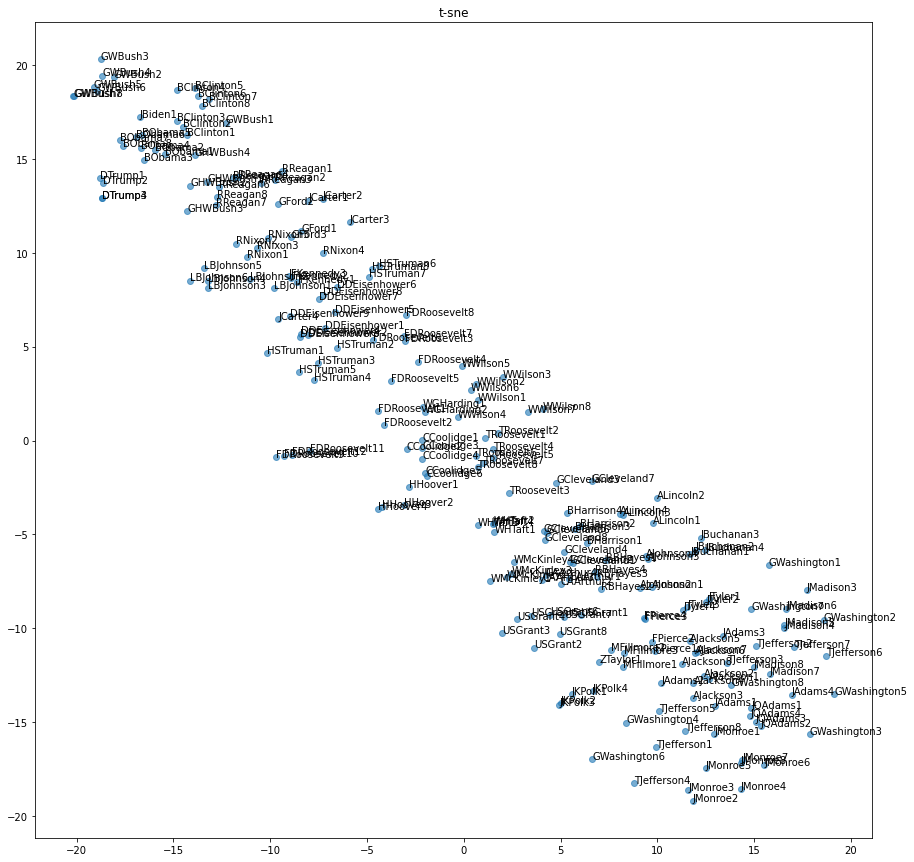

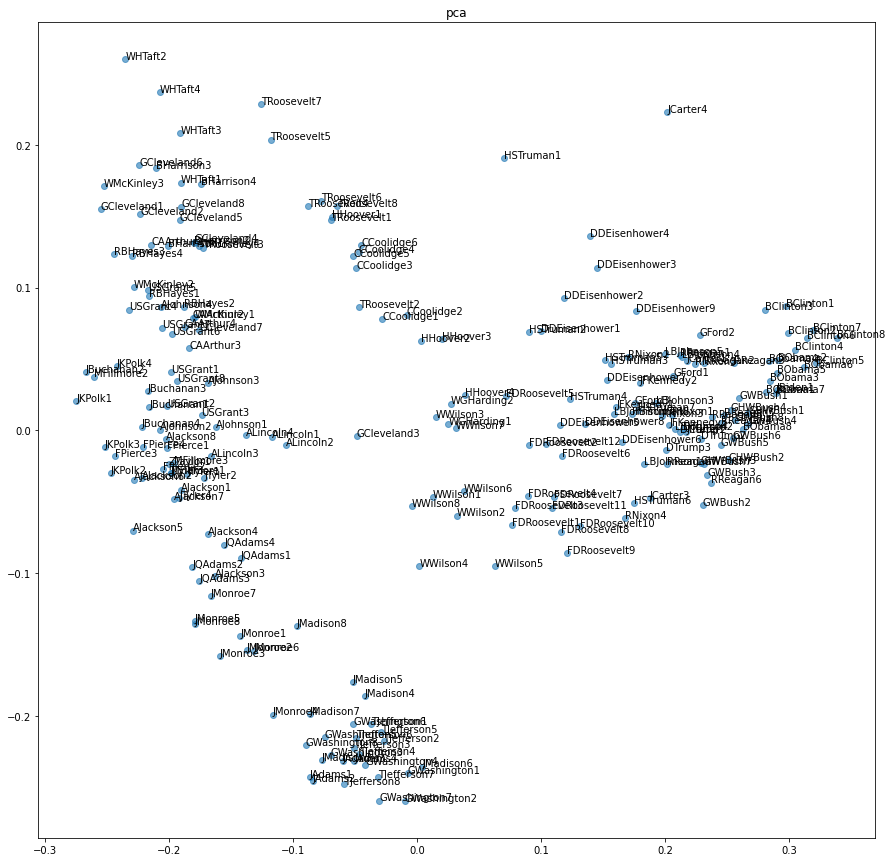

In [28]:
for proj, title in zip([tsne, pca], ['t-sne', 'pca']):
    plt.figure(figsize=[15, 15])
    plt.scatter(proj[:, 0], proj[:, 1], alpha=0.6)
    plt.title(title)
    for i, speech in enumerate(reduced.columns):
        plt.annotate(speech, (proj[i, 0], proj[i, 1]));

In [29]:
colors = {
    'JCarter': '#0000FF',
    'BClinton': '#0033FF',
    'BObama': '#0066FF',
    'JBiden': '#0099FF',

    'RReagan': '#FF0000',
    'GHWBush': '#FF3300',
    'GWBush': '#FF6600',
    'DTrump': '#FF0000'}

In [30]:
cols = [[col for col in list(reduced) if x in col] for x in recent]
cols = [speech for pres in cols for speech in pres]
#cols

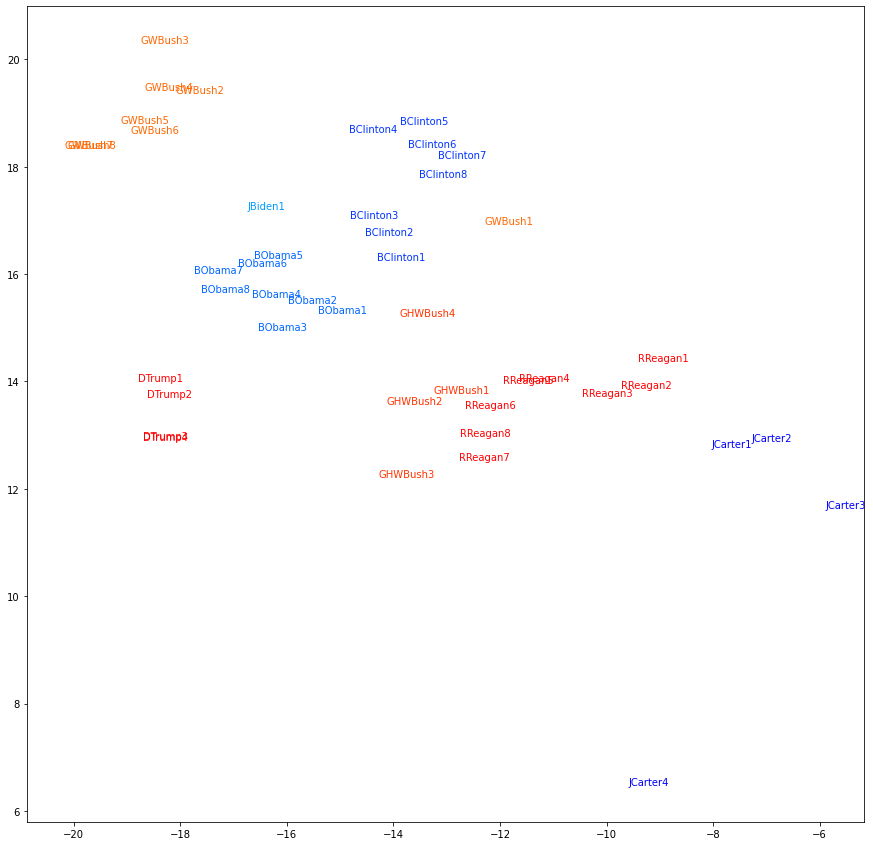

In [31]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(tsne[i, 0], tsne[i, 1], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors[pres]
        plt.annotate(speech, (tsne[i, 0], tsne[i, 1]), color=col);

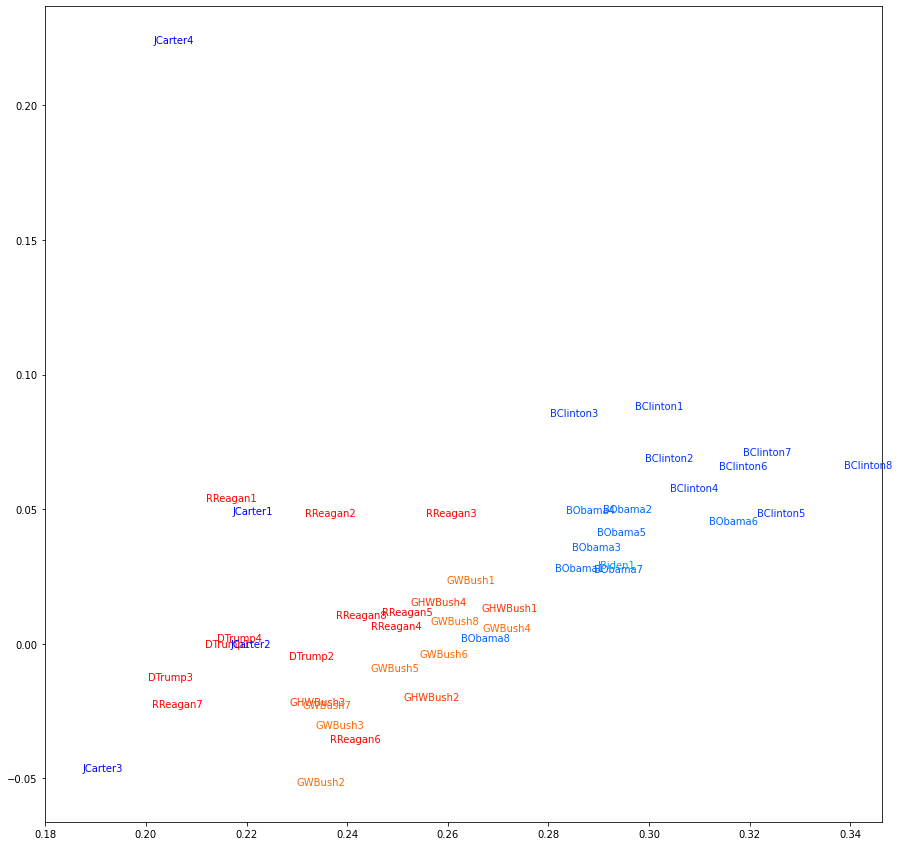

In [32]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(pca[i, 0], pca[i, 1], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors[pres]
        plt.annotate(speech, (pca[i, 0], pca[i, 1]), color=col);

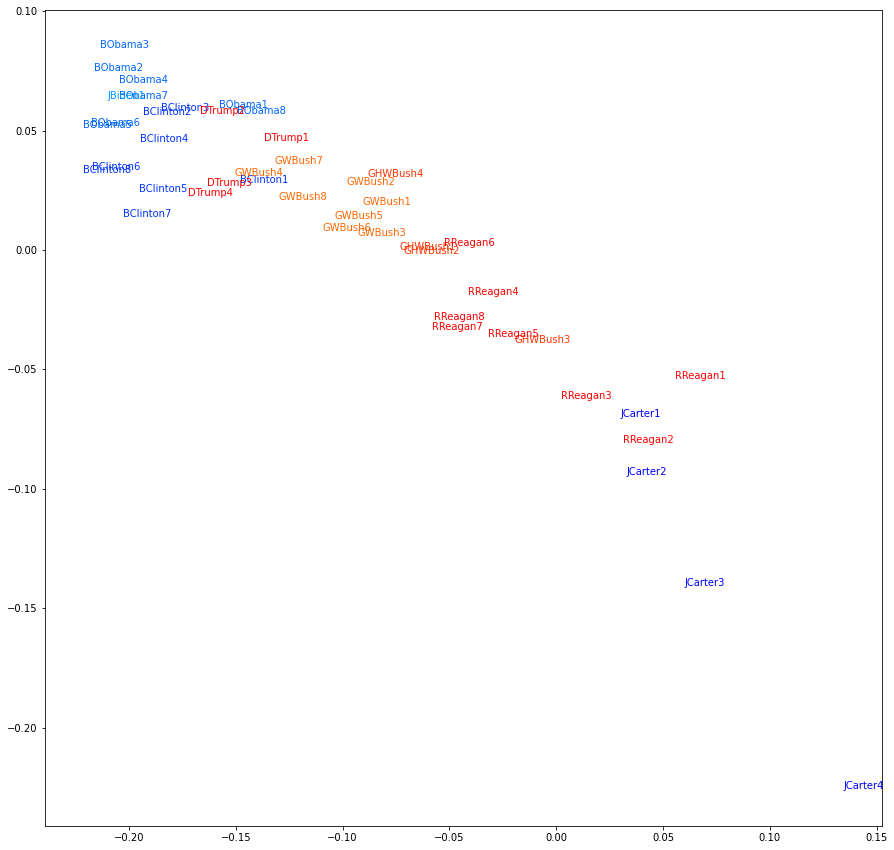

In [33]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(pca[i, 2], pca[i, 3], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors[pres]
        plt.annotate(speech, (pca[i, 2], pca[i, 3]), color=col);

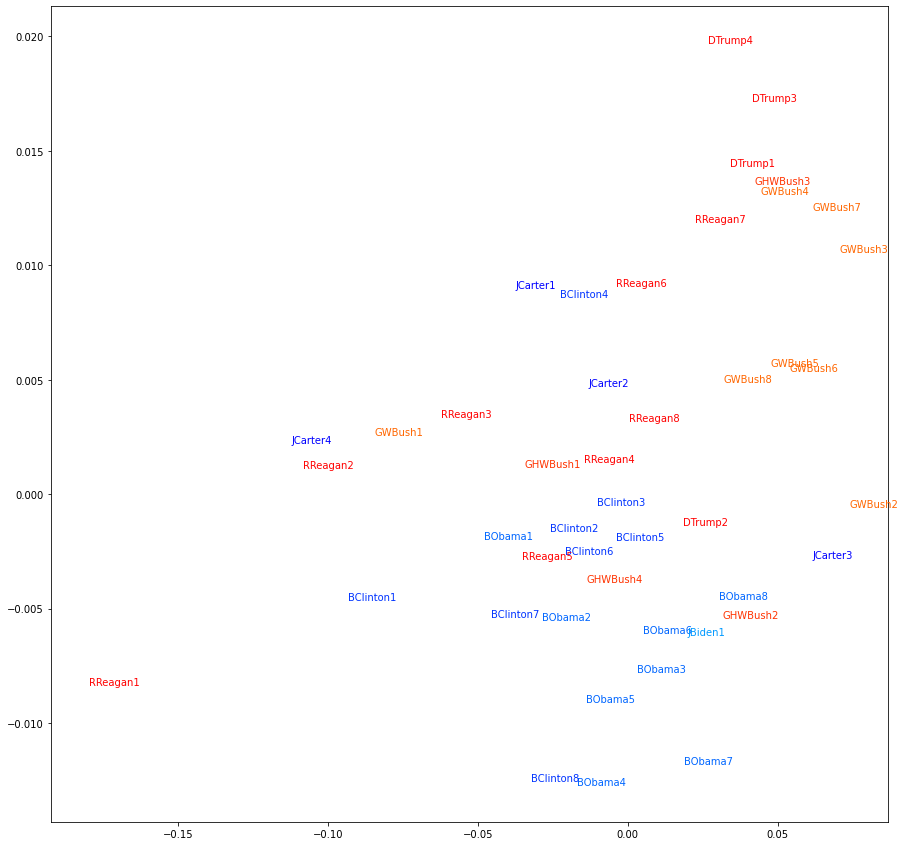

In [34]:
plt.figure(figsize=[15, 15])
for i, speech in enumerate(reduced.columns):
    if speech in cols:
        plt.scatter(pca[i, 4], pca[i, 5], alpha=0)
        pres = re.sub('[0-9]+', '', speech)
        col = colors[pres]
        plt.annotate(speech, (pca[i, 4], pca[i, 5]), color=col);